
### ANÁLISE ECONOMÉTRICA DO IMPACTO DA OFERTA DE ENERGIA ELÉTRICA E PETRÓLEO NA INFLAÇÃO NO BRASIL

#### 1. Introdução
A inflação é um fenômeno econômico que afeta diretamente o poder de compra da população e a estabilidade econômica de um país. No Brasil, a inflação tem sido uma preocupação constante, com variações significativas ao longo dos anos. Neste contexto, a oferta de energia elétrica e petróleo desempenha um papel crucial na formação dos preços, uma vez que esses insumos são fundamentais para a produção e o consumo de bens e serviços.
Neste trabalho, buscamos analisar o impacto da oferta de energia elétrica e petróleo na inflação no Brasil, utilizando dados mensais de 2000 a 2023. A análise será realizada por meio de modelos econométricos, com o objetivo de identificar a relação entre essas variáveis e a inflação, bem como avaliar a magnitude e a significância desse impacto.
#### 2. Metodologia
A metodologia adotada para a análise do impacto da oferta de energia elétrica e petróleo na inflação no Brasil envolve as seguintes etapas:
1. Coleta de dados: Serão coletados dados mensais de inflação (IPCA), oferta de energia elétrica e petróleo, entre outras variáveis relevantes, no período de 2000 a 2023.
2. Análise descritiva: Será realizada uma análise descritiva das variáveis, com o objetivo de identificar tendências, sazonalidades e possíveis outliers.
3. Testes de estacionariedade: Serão aplicados testes de estacionariedade (ADF, KPSS) para verificar se as séries temporais são estacionárias ou não.
4. Modelagem econométrica: Serão utilizados modelos econométricos, como ARIMA e VAR, para analisar a relação entre as variáveis e a inflação.
5. Análise de causalidade: Será realizada uma análise de causalidade de Granger para verificar se a oferta de energia elétrica e petróleo causam variações na inflação.
6. Interpretação dos resultados: Os resultados obtidos serão interpretados e discutidos, com o objetivo de entender a magnitude e a significância do impacto da oferta de energia elétrica e petróleo na inflação no Brasil.
7. Conclusões: Serão apresentadas as conclusões do trabalho, com sugestões para futuras pesquisas e implicações para a política econômica.
#### 3. Coleta de Dados
Os dados utilizados na análise foram coletados de fontes oficiais, como o Instituto Brasileiro de Geografia e Estatística (IBGE), ONS  - Operador Nacional do Sistema Elétrico e ANP -  Agência Nacional do Petróleo, Gás Natural e Biocombustíveis. As variáveis consideradas foram:
- Inflação (IPCA): 	Índice Nacional de Preços ao Consumidor - Amplo (IPCA) - Administrados, utilizado como medida da inflação no Brasil.
- Energia Elétrica armazenada: Capacidade de armazenamento de energia das bacias/reservatórios de todos os reservatórios cheios.
- Oferta de Óleo Bruto: Produção de petróleo no Brasil, medida em mil barris por dia.

##### 4. Análise Descritiva
A análise descritiva das variáveis foi realizada com o objetivo de identificar tendências, sazonalidades e possíveis outliers. A seguir, apresentamos gráficos e estatísticas descritivas das variáveis consideradas na análise.
```python

### 4.1 Análise de Distribuição das Variáveis

Vamos analisar a distribuição de cada variável do dataset para compreender melhor suas características.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Configurações para melhorar a visualização dos gráficos
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette('Set2')
sns.set_context('talk')

In [2]:
df  = pd.read_parquet('dados.parquet')

In [3]:
df.head(5) 
df.tail(5)

,data,ear,u.m_ear,oleo_bruto,u.m_oleo,ipca_admin,u.m_ipca
295,2024-08-01,61.476806,percentual,3340,Barris/dia (mil),-0.12,percentual
296,2024-09-01,50.736338,percentual,3470,Barris/dia (mil),1.01,percentual
297,2024-10-01,47.900840,percentual,3269,Barris/dia (mil),0.71,percentual
298,2024-11-01,48.537575,percentual,3310,Barris/dia (mil),-0.87,percentual
299,2024-12-01,52.692861,percentual,3419,Barris/dia (mil),-0.17,percentual


In [4]:
# Verificar informações básicas do DataFrame
print("Informações do DataFrame:")
print(f"Shape: {df.shape}")
print("\nInformações das colunas:")
df.info()

Informações do DataFrame:
Shape: (300, 7)

Informações das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   data        300 non-null    datetime64[ns]
 1   ear         300 non-null    float64       
 2   u.m_ear     300 non-null    object        
 3   oleo_bruto  300 non-null    int64         
 4   u.m_oleo    300 non-null    object        
 5   ipca_admin  300 non-null    float64       
 6   u.m_ipca    300 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 16.5+ KB


In [5]:
# Estatísticas descritivas do DataFrame
print("Estatísticas descritivas:")
display(df.describe(exclude=['datetime64[ns]', 'object']).T)

Estatísticas descritivas:


,count,mean,std,min,25%,50%,75%,max
ear,300.0,60.751847,13.644838,30.028935,50.560811,60.566563,71.783052,87.47971
oleo_bruto,300.0,2195.160000,631.169277,1121.000000,1695.000000,2077.500000,2636.500000,3678.00000
ipca_admin,300.0,0.568800,0.867214,-4.350000,0.177500,0.405000,0.882500,4.29000


In [6]:
# Lista todas as colunas no DataFrame exceto a data (se houver)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibir a lista de variáveis que serão analisadas
print(f"Variáveis numéricas disponíveis para análise: {numeric_columns}")

Variáveis numéricas disponíveis para análise: ['ear', 'oleo_bruto', 'ipca_admin']


In [7]:
def plot_variable_distribution(dataframe, variable):
    """
    Função para criar múltiplos gráficos de distribuição para uma variável
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'Análise de Distribuição: {variable}', fontsize=16)
    
    # Histograma com curva de densidade
    sns.histplot(dataframe[variable], kde=True, ax=axes[0, 0])
    axes[0, 0].set_title('Histograma com Curva de Densidade')
    axes[0, 0].set_xlabel(variable)
    axes[0, 0].grid(True)
    
    # Boxplot
    sns.boxplot(y=dataframe[variable], ax=axes[0, 1])
    axes[0, 1].set_title('Boxplot')
    axes[0, 1].set_ylabel(variable)
    axes[0, 1].grid(True)
    
    # QQ Plot para verificar normalidade
    from scipy import stats
    qq = stats.probplot(dataframe[variable].dropna(), dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ Plot (Verificação de Normalidade)')
    axes[1, 0].grid(True)
    
    # Gráfico de violino
    sns.violinplot(y=dataframe[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Violin Plot')
    axes[1, 1].set_ylabel(variable)
    axes[1, 1].grid(True)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    # Estatísticas descritivas específicas da variável
    print(f"\nEstatísticas descritivas para {variable}:")
    stats_df = pd.DataFrame({
        'Média': [dataframe[variable].mean()],
        'Mediana': [dataframe[variable].median()],
        'Desvio Padrão': [dataframe[variable].std()],
        'Variância': [dataframe[variable].var()],
        'Mínimo': [dataframe[variable].min()],
        'Máximo': [dataframe[variable].max()],
        'Assimetria': [dataframe[variable].skew()],
        'Curtose': [dataframe[variable].kurtosis()]
    })
    display(stats_df.T)
    
    # Verificar normalidade com teste estatístico
    print(f"\nTeste de Normalidade (Shapiro-Wilk) para {variable}:")
    shapiro_test = stats.shapiro(dataframe[variable].dropna())
    print(f"Estatística de teste: {shapiro_test[0]:.4f}")
    print(f"Valor p: {shapiro_test[1]:.4f}")
    if shapiro_test[1] < 0.05:
        print("Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).")
    else:
        print("Conclusão: A distribuição pode ser considerada normal (não rejeita hipótese nula).")


Análise de Distribuição para: ear


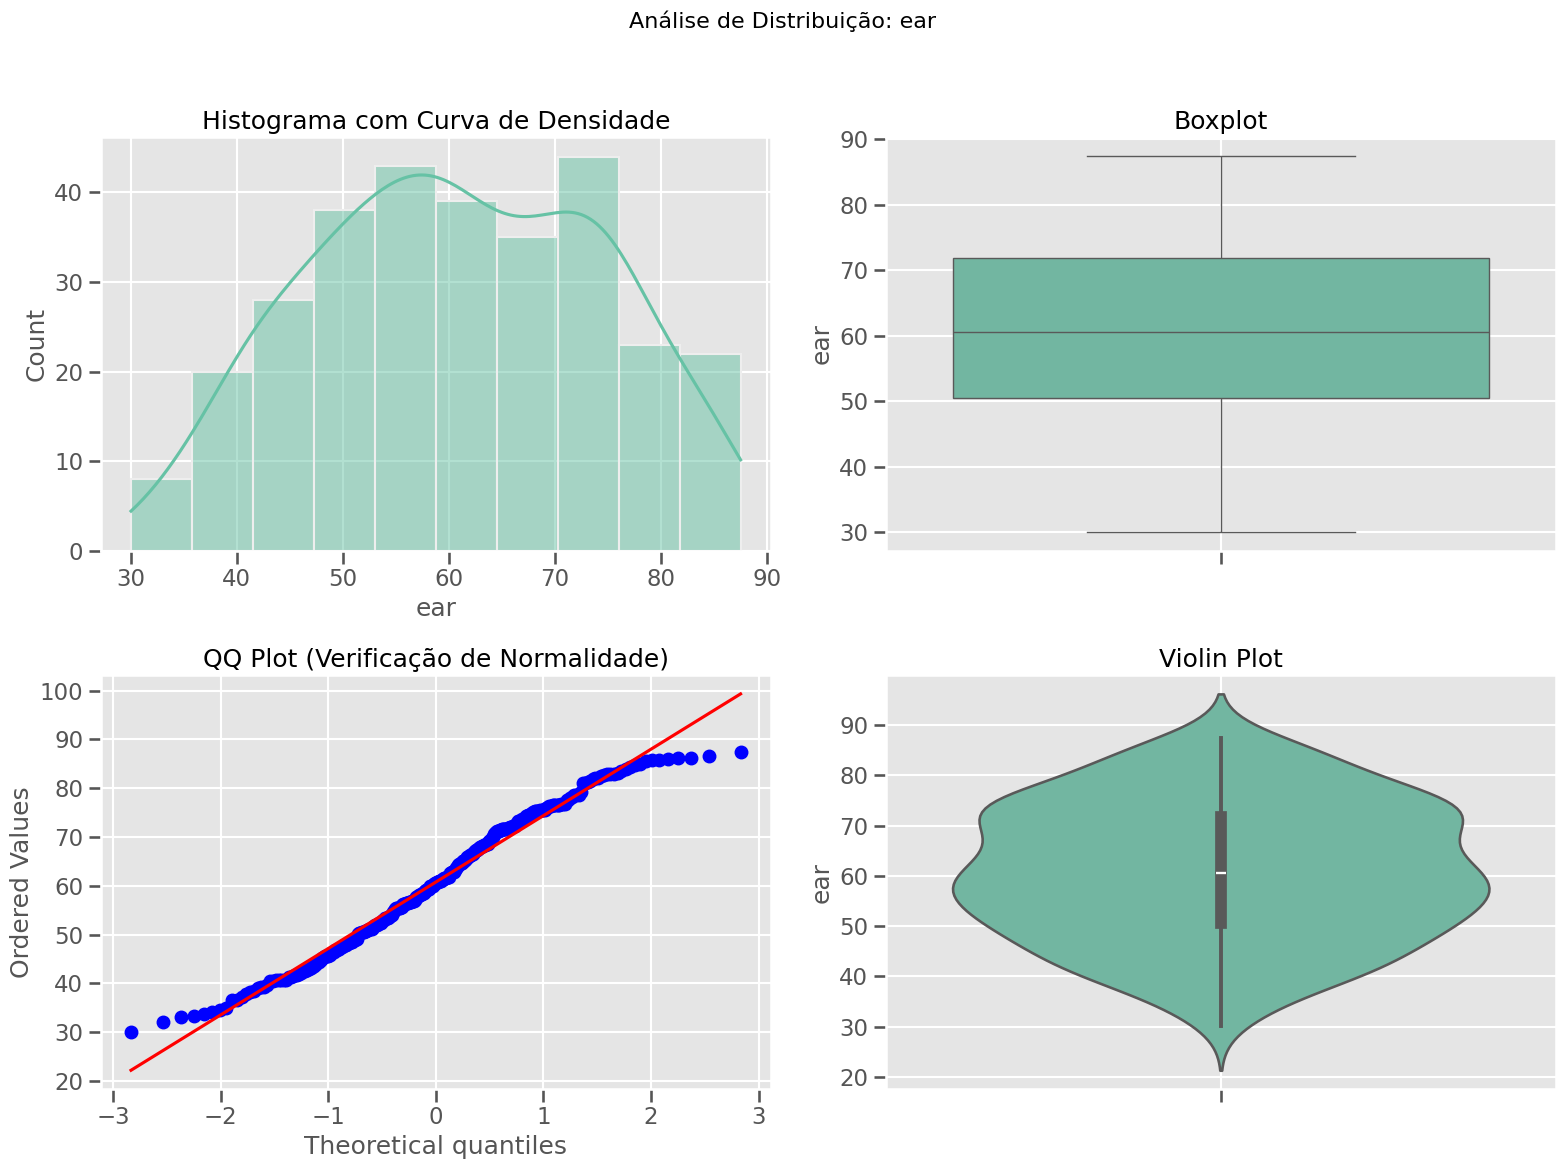


Estatísticas descritivas para ear:


,0
Média,60.751847
Mediana,60.566563
Desvio Padrão,13.644838
Variância,186.181591
Mínimo,30.028935
Máximo,87.479710
Assimetria,-0.039185
Curtose,-0.877915



Teste de Normalidade (Shapiro-Wilk) para ear:
Estatística de teste: 0.9806
Valor p: 0.0004
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: oleo_bruto


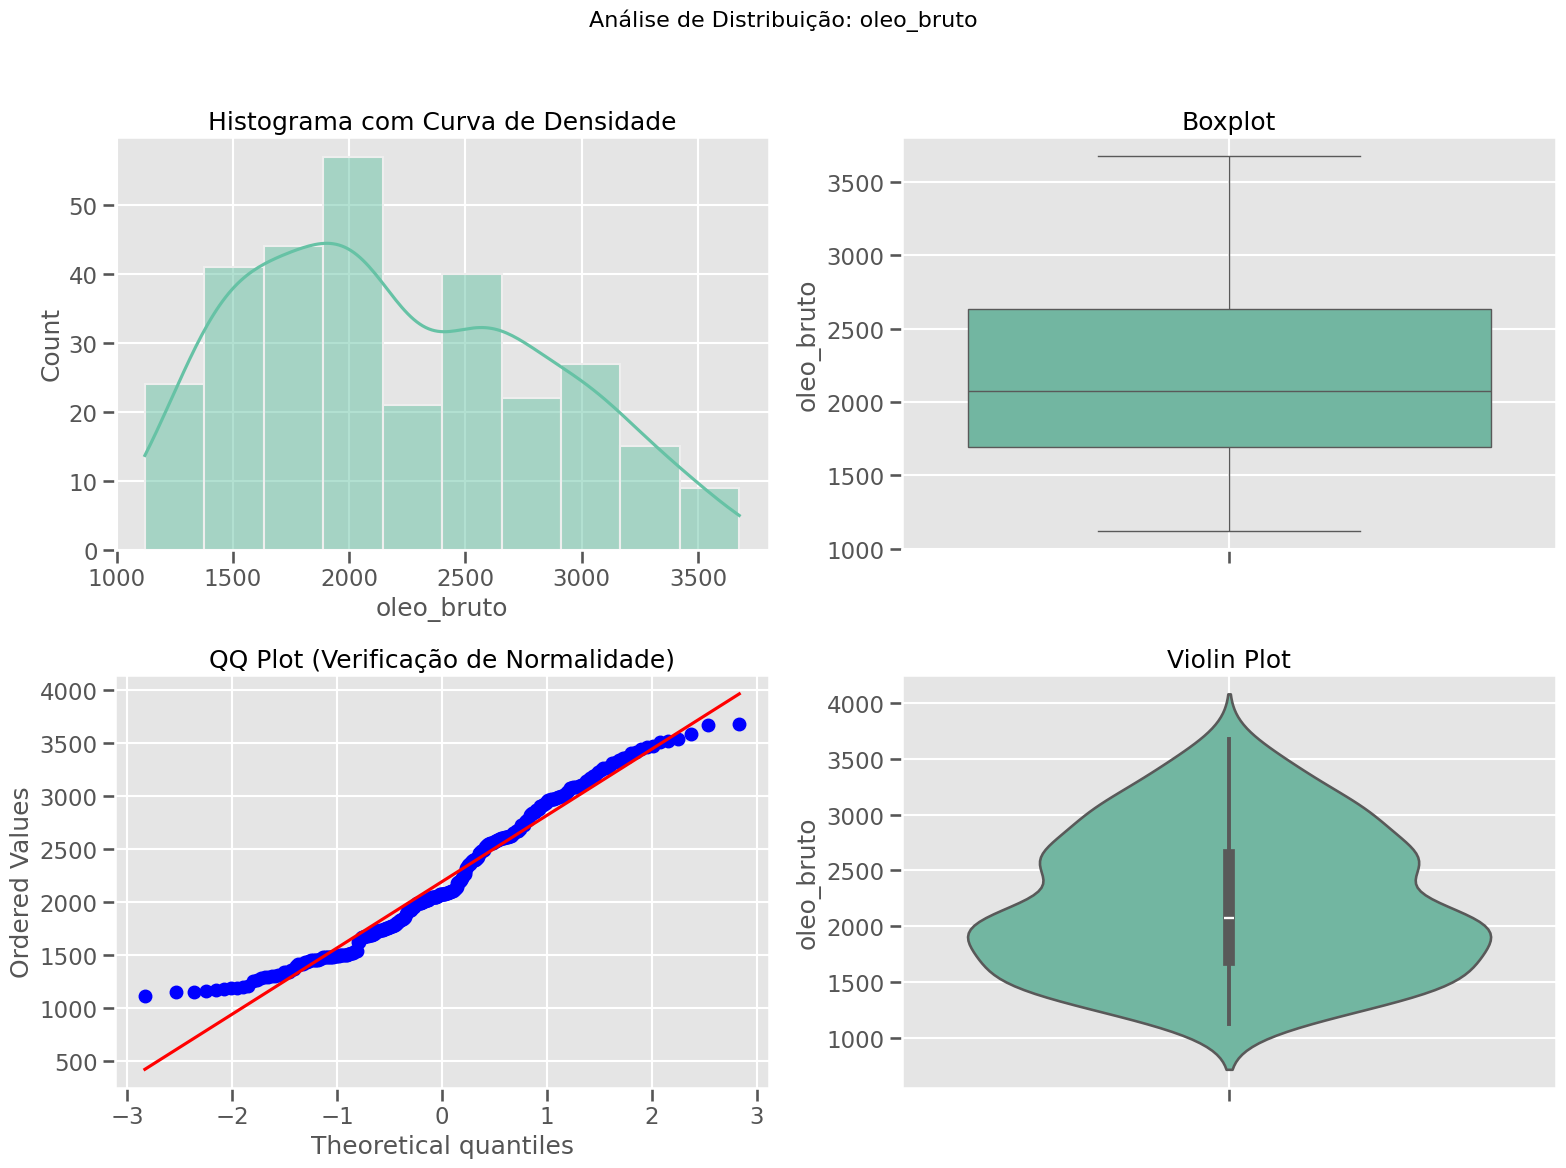


Estatísticas descritivas para oleo_bruto:


,0
Média,2195.160000
Mediana,2077.500000
Desvio Padrão,631.169277
Variância,398374.656589
Mínimo,1121.000000
Máximo,3678.000000
Assimetria,0.343534
Curtose,-0.850090



Teste de Normalidade (Shapiro-Wilk) para oleo_bruto:
Estatística de teste: 0.9636
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).

Análise de Distribuição para: ipca_admin


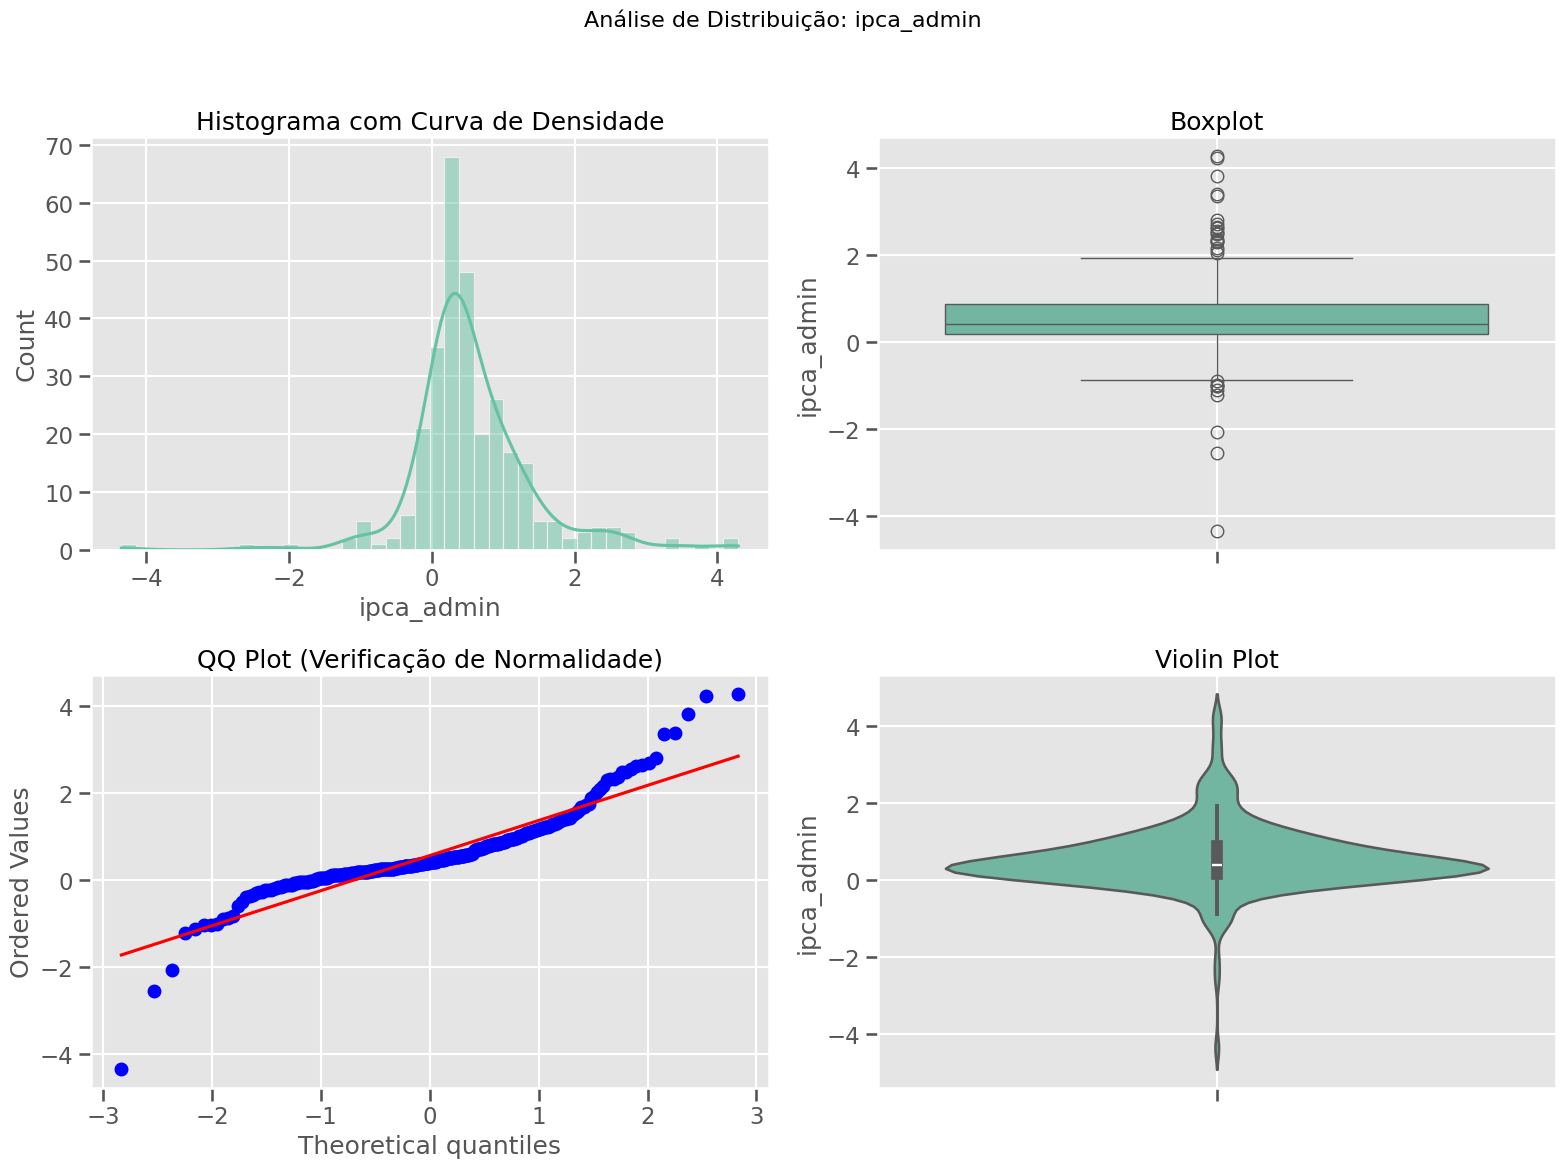


Estatísticas descritivas para ipca_admin:


,0
Média,0.568800
Mediana,0.405000
Desvio Padrão,0.867214
Variância,0.752059
Mínimo,-4.350000
Máximo,4.290000
Assimetria,0.416026
Curtose,6.664785



Teste de Normalidade (Shapiro-Wilk) para ipca_admin:
Estatística de teste: 0.8642
Valor p: 0.0000
Conclusão: A distribuição não parece ser normal (rejeita hipótese nula).


In [8]:
# Loop para criar gráficos de distribuição para cada variável numérica
for column in numeric_columns:
    print(f"\n{'='*80}")
    print(f"Análise de Distribuição para: {column}")
    print(f"{'='*80}")
    plot_variable_distribution(df, column)

In [9]:
# Verificamos que o DataFrame tem uma coluna de data com periodicidade mensal
# Se não estiver configurada corretamente, vamos garantir o formato correto

# Primeiro, vamos identificar a coluna de data
date_columns = df.select_dtypes(include=['datetime64']).columns.tolist()

if len(date_columns) > 0:
    date_column = date_columns[0]  # Assumimos que a primeira coluna de data é a que queremos usar
else:
    # Vamos tentar encontrar uma coluna que pode ser a data
    potential_date_columns = [col for col in df.columns if 'data' in col.lower() or 'date' in col.lower() or 'mes' in col.lower() or 'month' in col.lower()]
    
    if len(potential_date_columns) > 0:
        date_column = potential_date_columns[0]
        print(f"Convertendo coluna {date_column} para datetime")
        df[date_column] = pd.to_datetime(df[date_column])
    else:
        print("Nenhuma coluna de data identificada. Criando um índice temporal baseado na periodicidade mensal.")
        # Criamos um índice de data mensal começando pela data mais provável
        df['data'] = pd.date_range(start='2000-01-01', periods=len(df), freq='MS')
        date_column = 'data'

# Configurar a coluna de data como índice para facilitar a análise temporal
df_ts = df.copy()
if date_column in df_ts.columns:  # Verifica se a coluna existe (pode já ser o índice)
    df_ts = df_ts.set_index(date_column)


### 4.2 Análise Temporal das Variáveis

Vamos visualizar como as variáveis evoluem ao longo do tempo para identificar tendências, sazonalidades, outliers e possíveis relações entre elas. Como o dataset possui periodicidade mensal, utilizaremos gráficos de linha para analisar o comportamento temporal das variáveis.

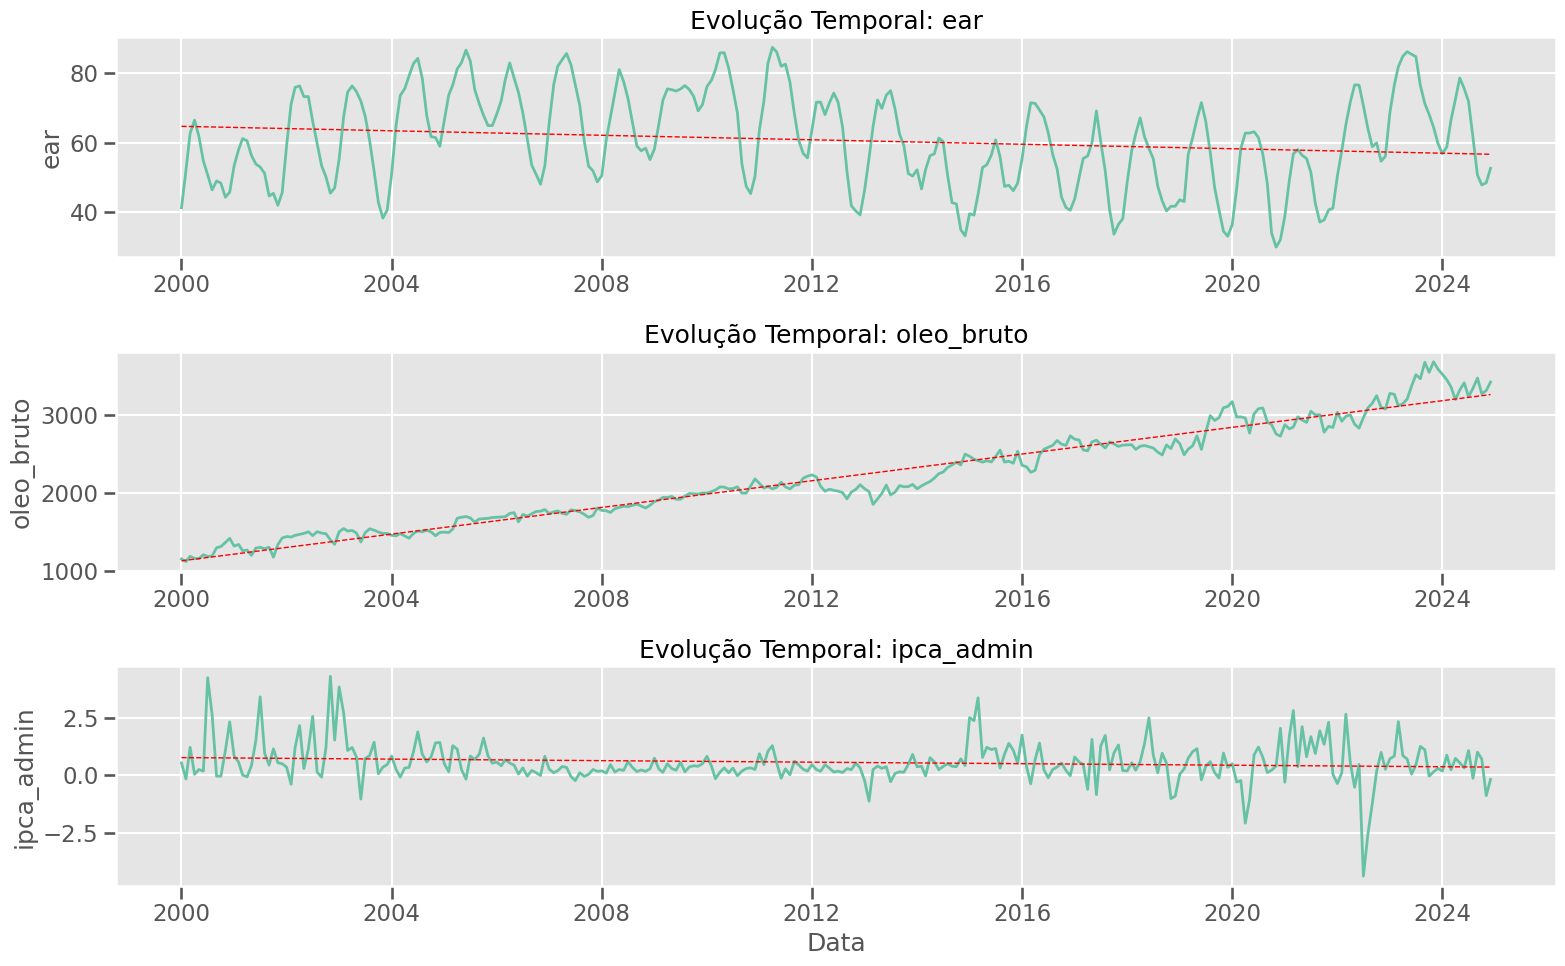

In [10]:
# 1. Visualização individual de cada variável ao longo do tempo
plt.figure(figsize=(16, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    plt.plot(df_ts.index, df_ts[column], linewidth=2)
    plt.title(f'Evolução Temporal: {column}')
    plt.ylabel(column)
    plt.grid(True)
    
    # Adicionar linha de tendência
    z = np.polyfit(range(len(df_ts.index)), df_ts[column].values, 1)
    p = np.poly1d(z)
    plt.plot(df_ts.index, p(range(len(df_ts.index))), "r--", linewidth=1)

plt.xlabel('Data')
plt.tight_layout()
plt.show()

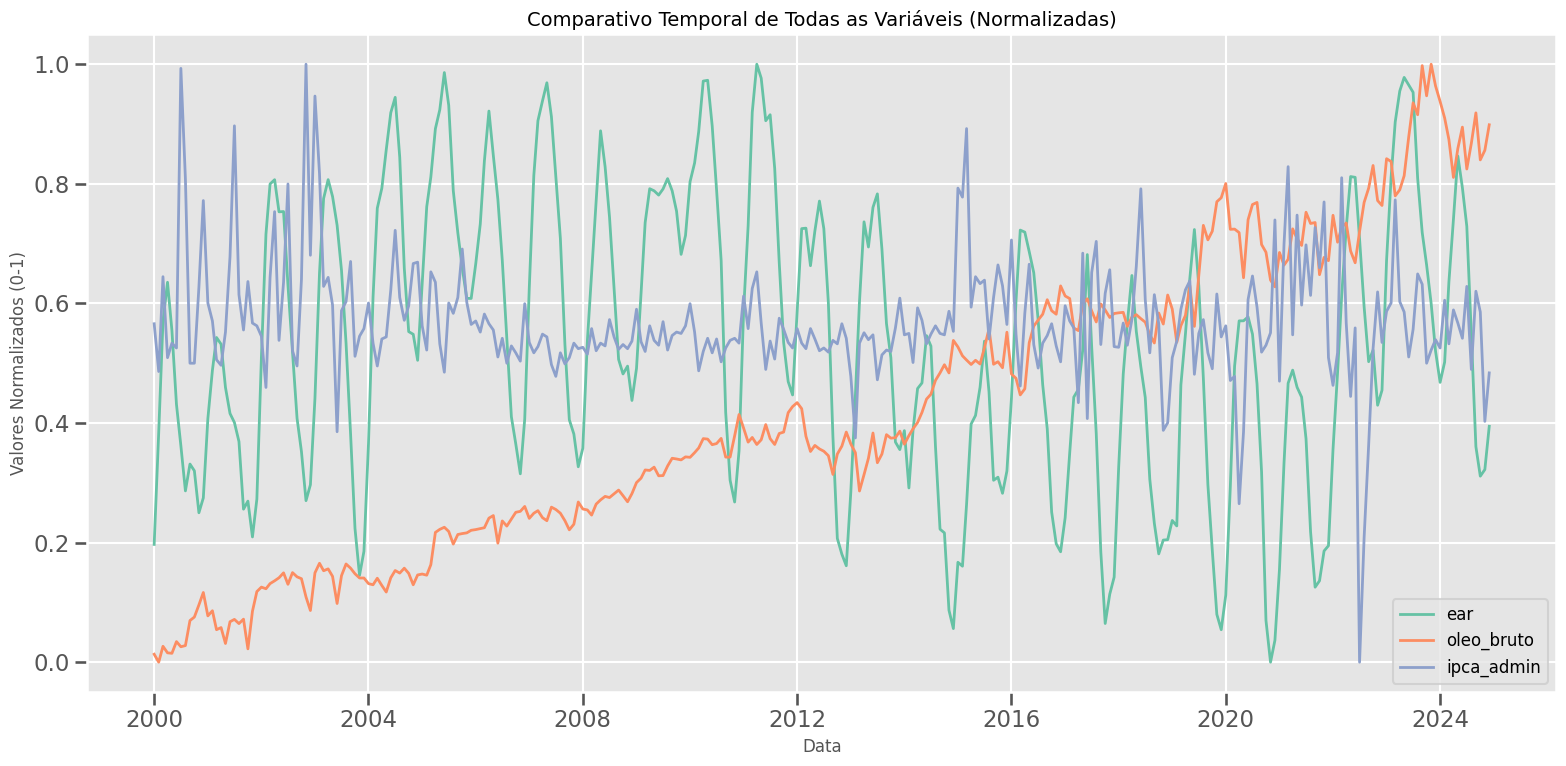

Nota: Os valores foram normalizados para uma escala de 0 a 1 para facilitar a comparação visual entre variáveis com diferentes escalas.


In [11]:
# 2. Visualização comparativa de todas as variáveis em um único gráfico
plt.figure(figsize=(16, 8))

# Normalizar as variáveis para facilitar a comparação visual
from sklearn.preprocessing import MinMaxScaler

# Criar um DataFrame normalizado para visualização comparativa
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_ts[numeric_columns]), 
                            index=df_ts.index, columns=numeric_columns)

# Plotar todas as variáveis normalizadas juntas
for column in numeric_columns:
    plt.plot(df_normalized.index, df_normalized[column], linewidth=2, label=column)

plt.title('Comparativo Temporal de Todas as Variáveis (Normalizadas)', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valores Normalizados (0-1)', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

# Adicionar uma explicação sobre a normalização
print("Nota: Os valores foram normalizados para uma escala de 0 a 1 para facilitar a comparação visual entre variáveis com diferentes escalas.")

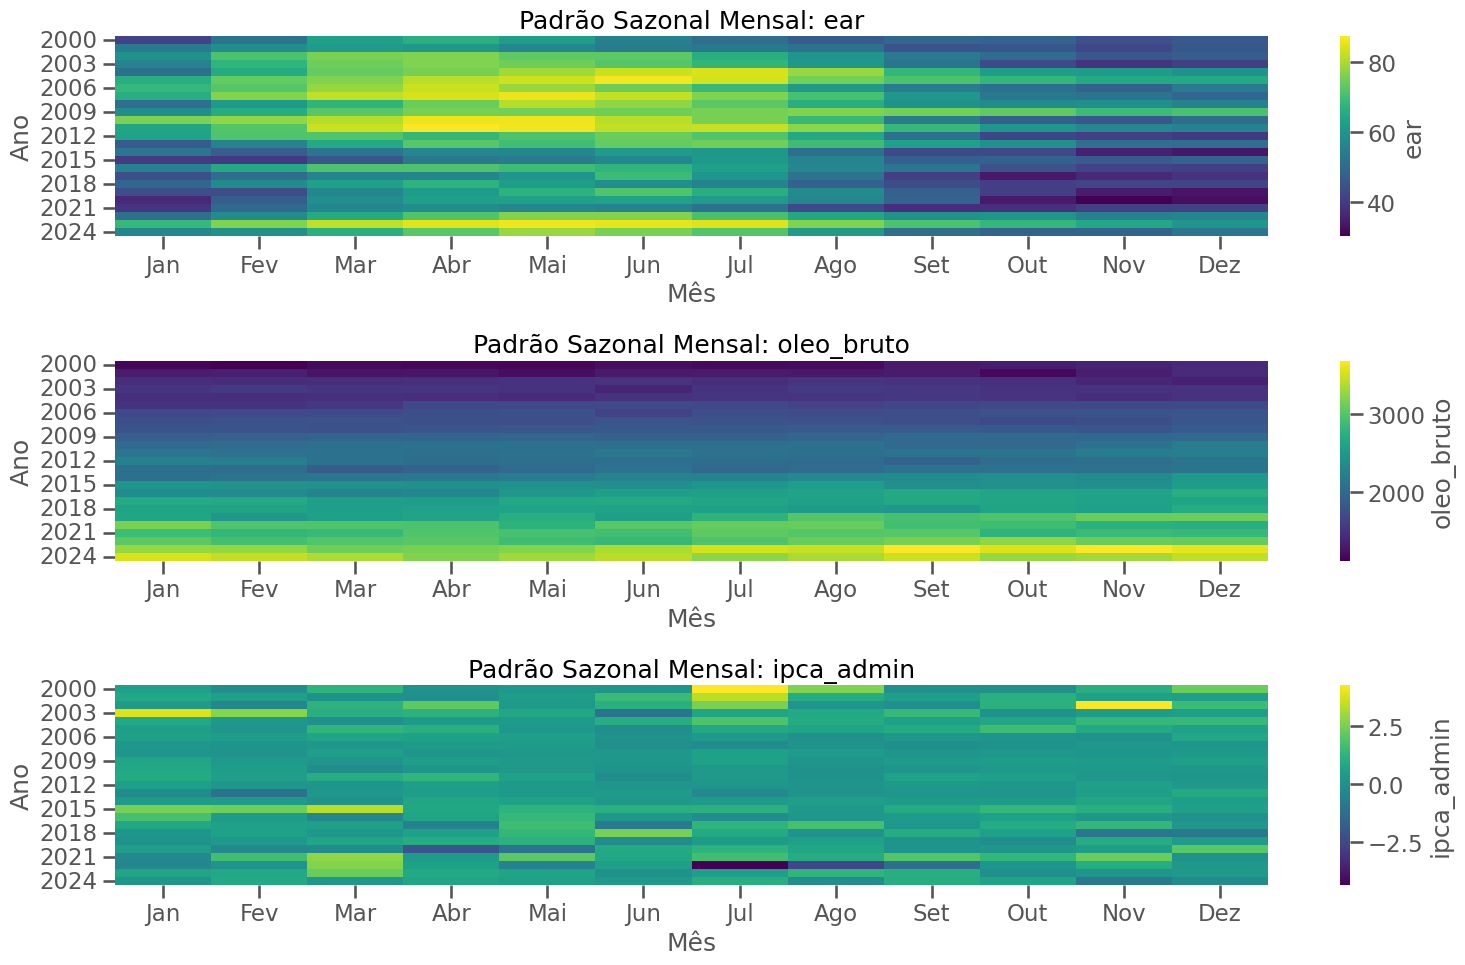

In [12]:
# 3. Análise de sazonalidade - Visualização de padrões mensais
plt.figure(figsize=(16, 10))

# Para cada variável, criar um gráfico de calor (heatmap) mostrando padrões mensais ao longo dos anos
for i, column in enumerate(numeric_columns):
    # Obter o ano e mês do índice para criar a matriz de sazonalidade
    years = df_ts.index.year.unique()
    months = range(1, 13)
    
    # Criar um DataFrame com anos nas linhas e meses nas colunas
    seasonal_df = pd.DataFrame(index=years, columns=months, dtype=float)
    
    # Preencher o DataFrame com valores
    for year in years:
        for month in months:
            # Obter o valor médio para o mês/ano específico (quando disponível)
            try:
                mask = (df_ts.index.year == year) & (df_ts.index.month == month)
                seasonal_df.loc[year, month] = df_ts.loc[mask, column].mean()
            except:
                seasonal_df.loc[year, month] = np.nan
    
    # Converter para valores numéricos (float) para evitar erro de tipo
    seasonal_df = seasonal_df.astype(float)
    
    plt.subplot(len(numeric_columns), 1, i+1)
    ax = sns.heatmap(seasonal_df, cmap='viridis', annot=False, fmt='.1f', cbar_kws={'label': column})
    plt.title(f'Padrão Sazonal Mensal: {column}')
    plt.xlabel('Mês')
    plt.ylabel('Ano')
    
    # Ajustar os rótulos dos eixos
    ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    
plt.tight_layout()
plt.show()

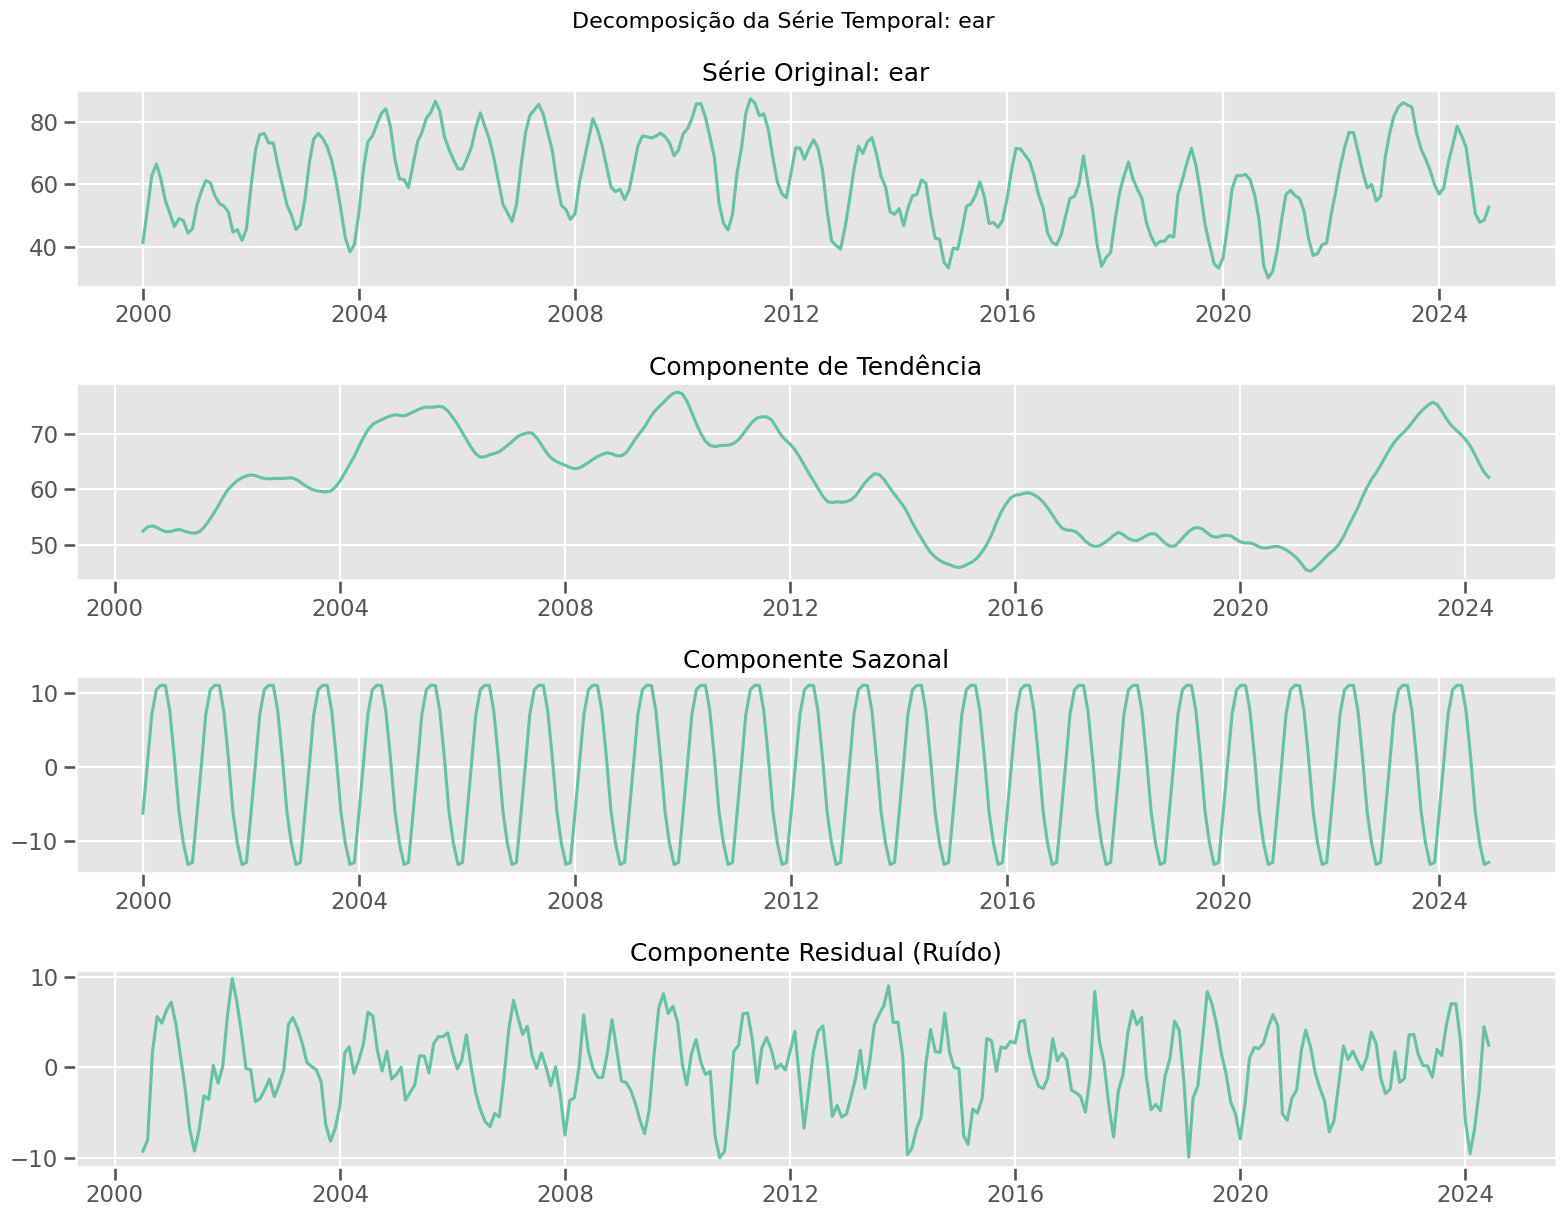

,Tendência,Sazonalidade,Resíduos
count,288.000000,3.000000e+02,288.000000
mean,60.935510,-4.085621e-16,0.011829
std,8.832146,9.064903e+00,4.206366
min,45.366263,-1.318182e+01,-9.977034
25%,52.399894,-7.277221e+00,-2.778262
50%,61.527662,8.770327e-01,0.148634
75%,68.352888,8.255618e+00,2.944708
max,77.448442,1.102028e+01,9.805095


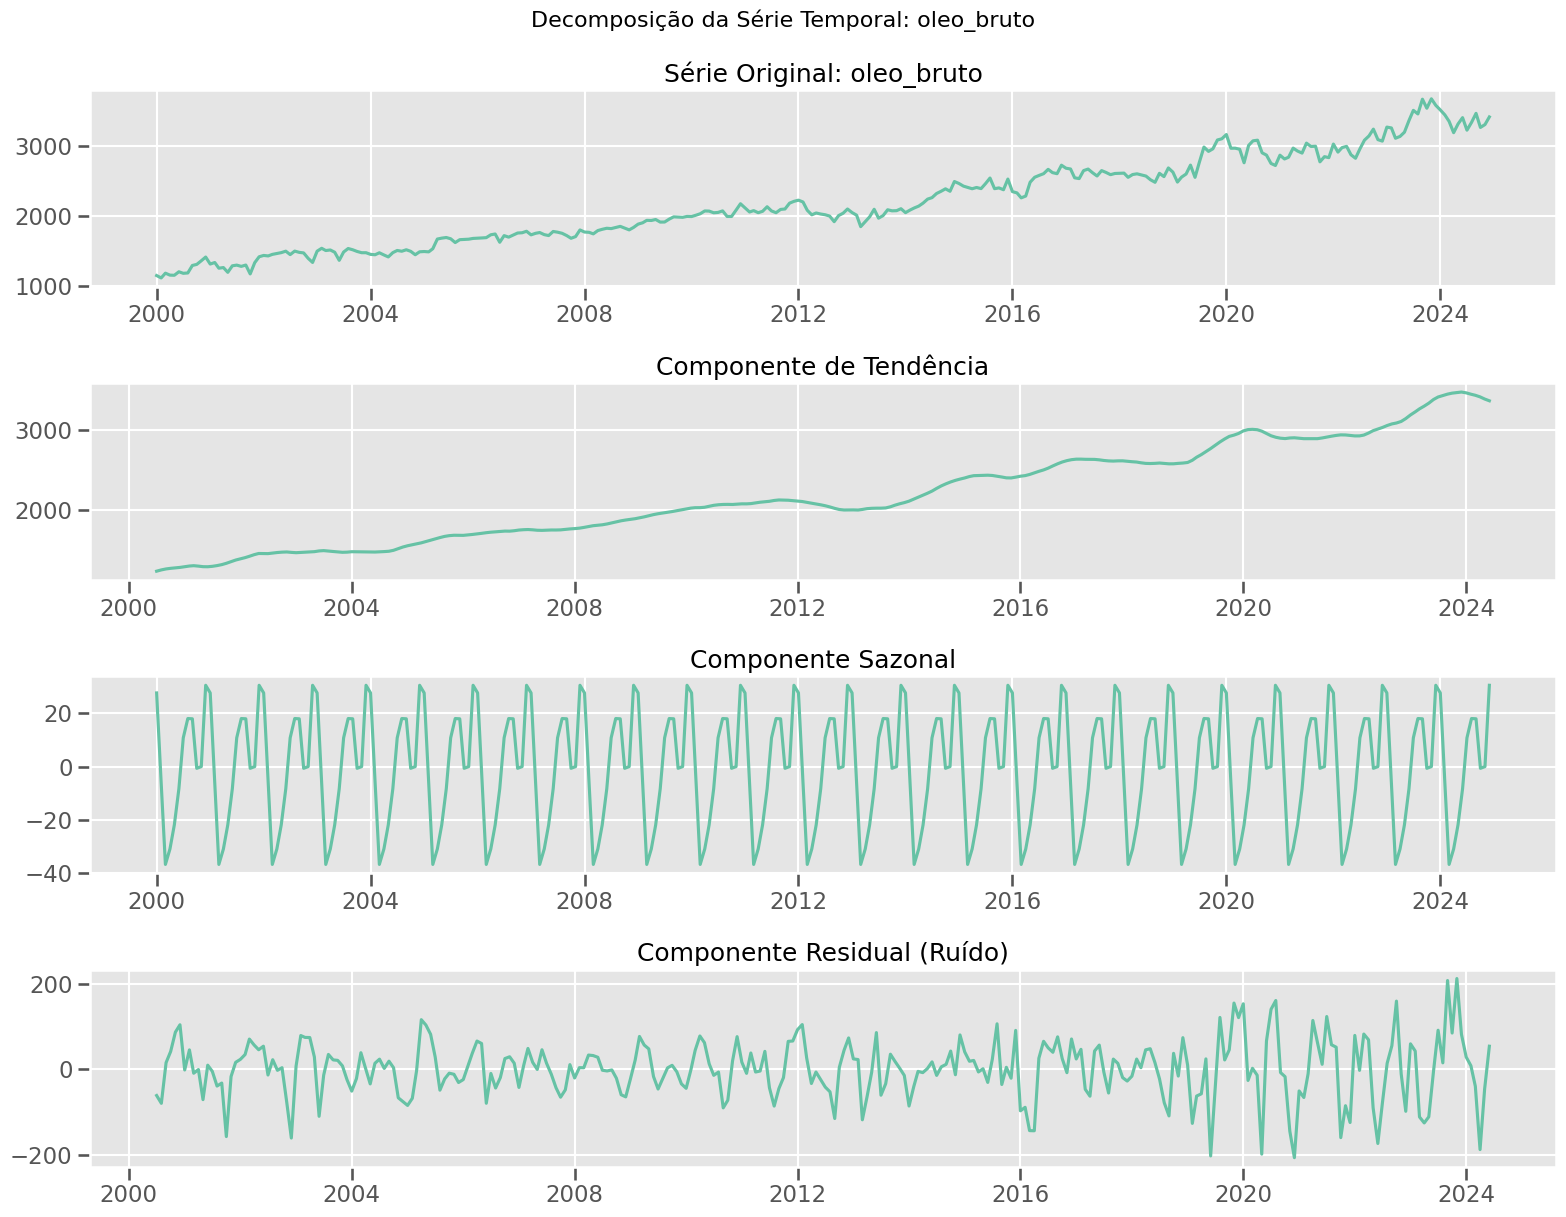

,Tendência,Sazonalidade,Resíduos
count,288.000000,3.000000e+02,288.000000
mean,2192.267216,1.539509e-16,0.496672
std,598.561089,2.114317e+01,66.672348
min,1237.750000,-3.674841e+01,-206.725550
25%,1722.687500,-1.174320e+01,-34.117477
50%,2077.187500,-3.595197e-01,3.151186
75%,2619.802083,1.792781e+01,41.412037
max,3473.000000,3.047555e+01,211.665075


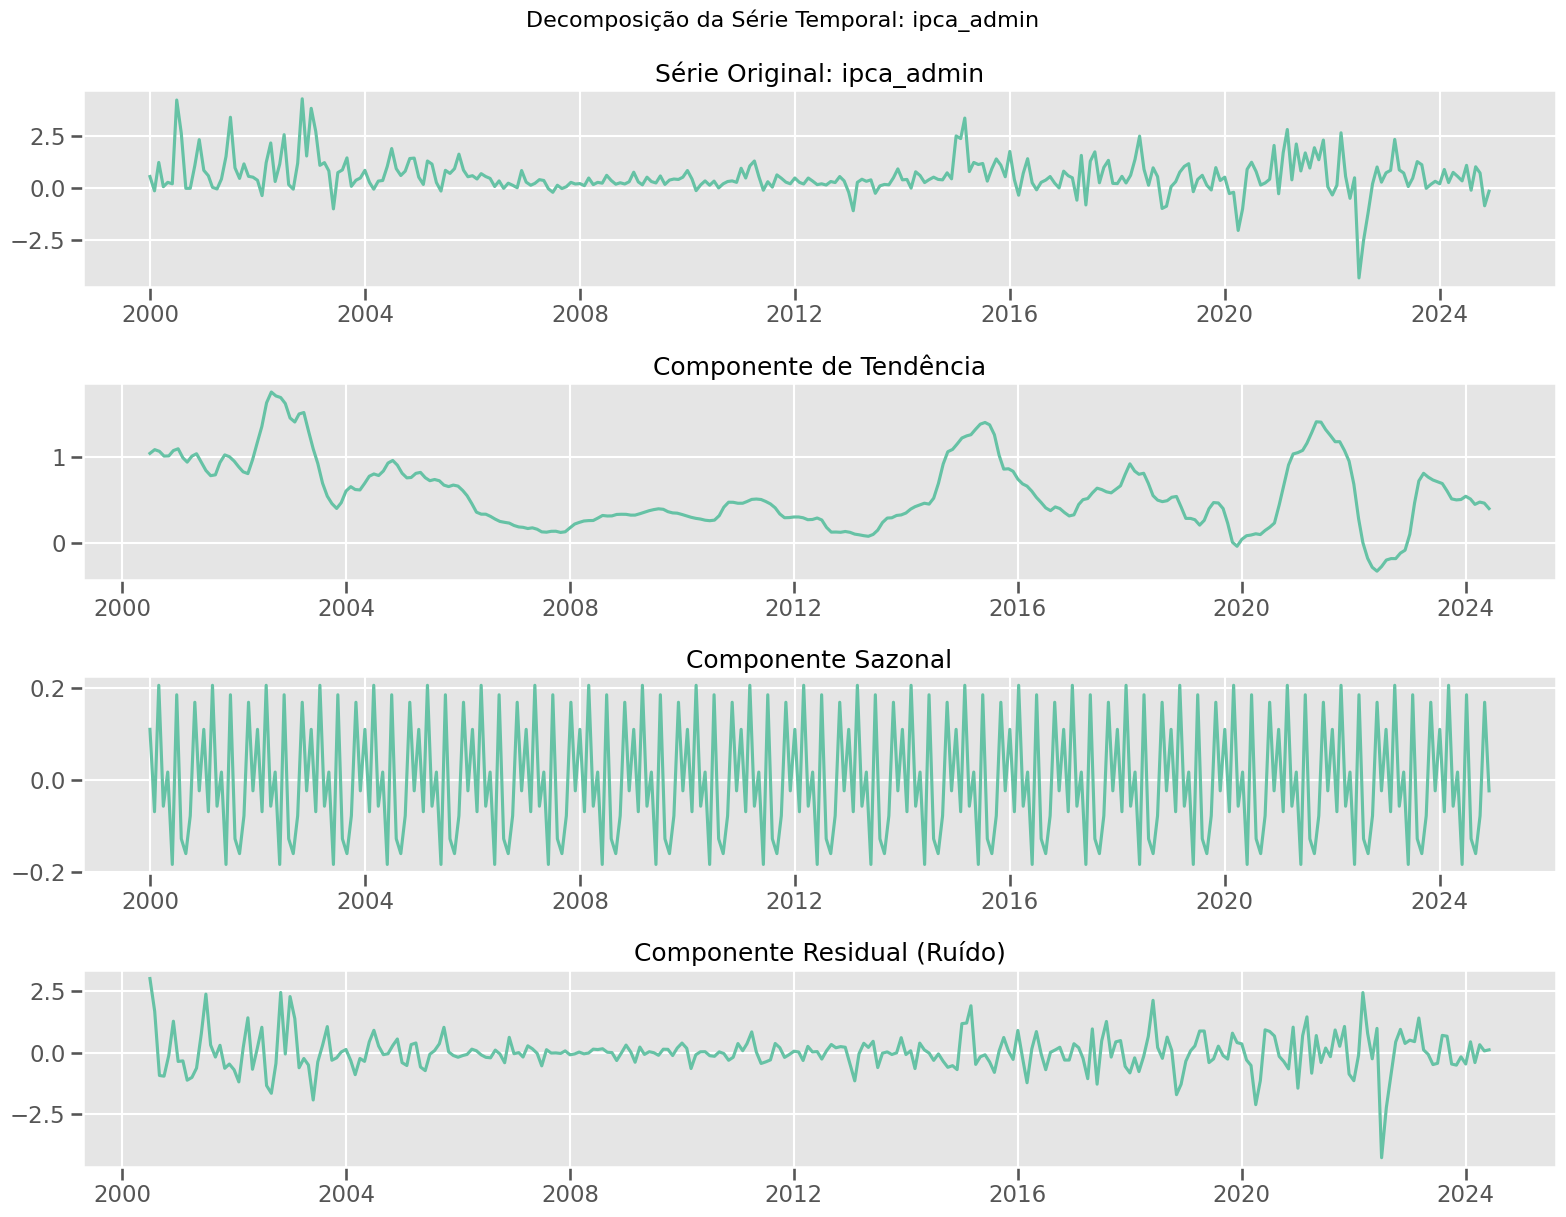

,Tendência,Sazonalidade,Resíduos
count,288.000000,3.000000e+02,288.000000
mean,0.570278,-7.389922e-18,0.009201
std,0.397902,1.317564e-01,0.745502
min,-0.319167,-1.824826e-01,-4.270642
25%,0.292396,-8.931424e-02,-0.329219
50%,0.475833,-3.930556e-02,-0.020938
75%,0.808438,1.256684e-01,0.304210
max,1.743750,2.066667e-01,3.006441


In [13]:
# 4. Decomposição das séries temporais para identificar tendências, sazonalidade e resíduos
from statsmodels.tsa.seasonal import seasonal_decompose

for column in numeric_columns:
    plt.figure(figsize=(16, 12))
    
    try:
        # Aplicar decomposição da série temporal
        decomposition = seasonal_decompose(df_ts[column], model='additive', period=12)  # period=12 para dados mensais
        
        # Plotar os componentes da decomposição
        plt.subplot(4, 1, 1)
        plt.plot(df_ts.index, df_ts[column])
        plt.title(f'Série Original: {column}')
        plt.grid(True)
        
        plt.subplot(4, 1, 2)
        plt.plot(decomposition.trend)
        plt.title('Componente de Tendência')
        plt.grid(True)
        
        plt.subplot(4, 1, 3)
        plt.plot(decomposition.seasonal)
        plt.title('Componente Sazonal')
        plt.grid(True)
        
        plt.subplot(4, 1, 4)
        plt.plot(decomposition.resid)
        plt.title('Componente Residual (Ruído)')
        plt.grid(True)
        
        plt.tight_layout()
        plt.suptitle(f'Decomposição da Série Temporal: {column}', fontsize=16, y=1.02)
        plt.show()
        
        # Análise estatística dos componentes
        components_stats = pd.DataFrame({
            'Tendência': decomposition.trend.dropna().describe(),
            'Sazonalidade': decomposition.seasonal.dropna().describe(),
            'Resíduos': decomposition.resid.dropna().describe()
        })
        display(components_stats)
        
    except Exception as e:
        print(f"Não foi possível realizar a decomposição para {column}: {e}")

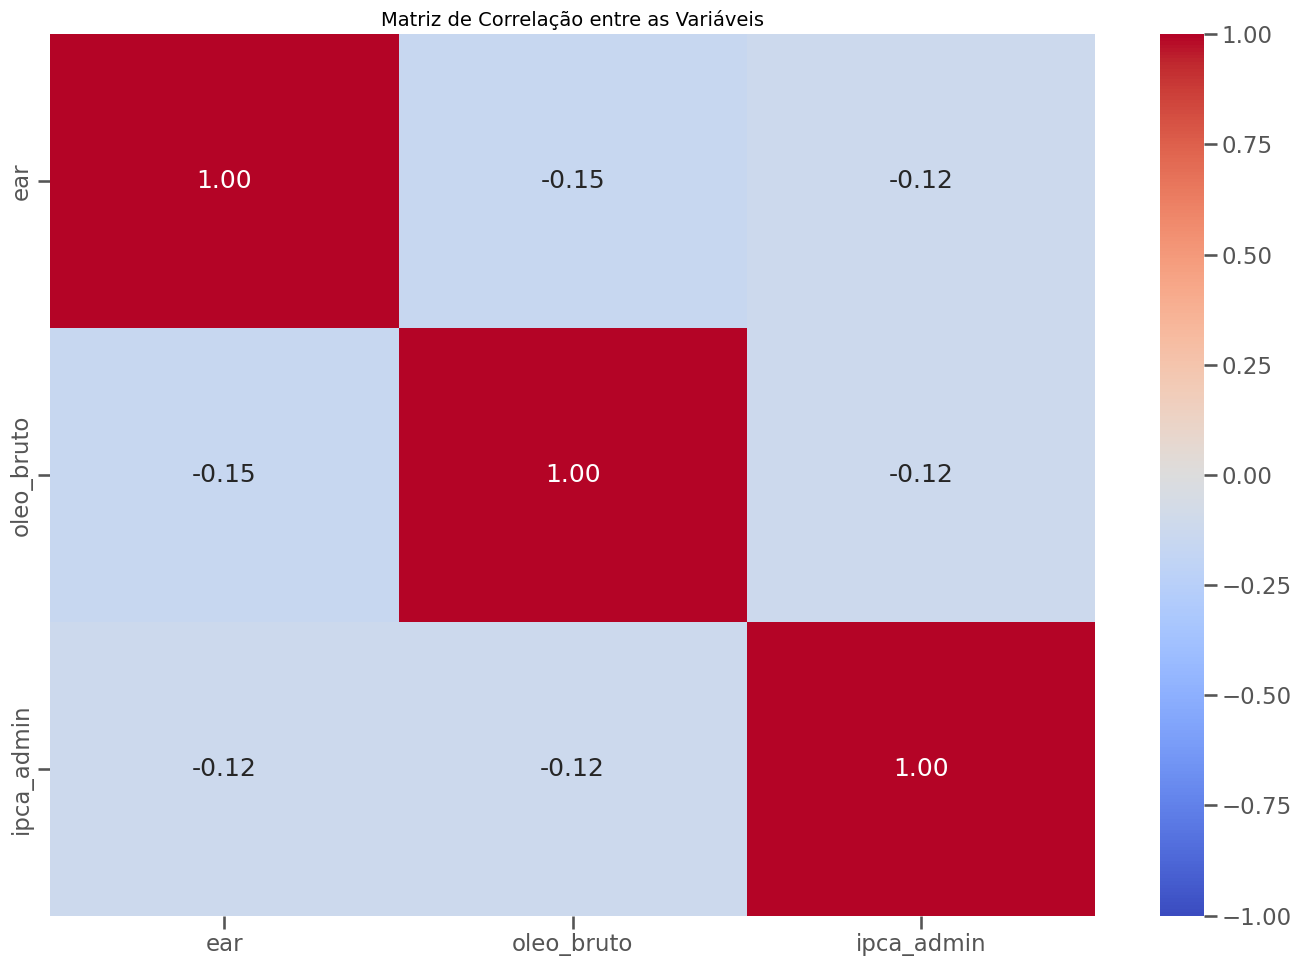

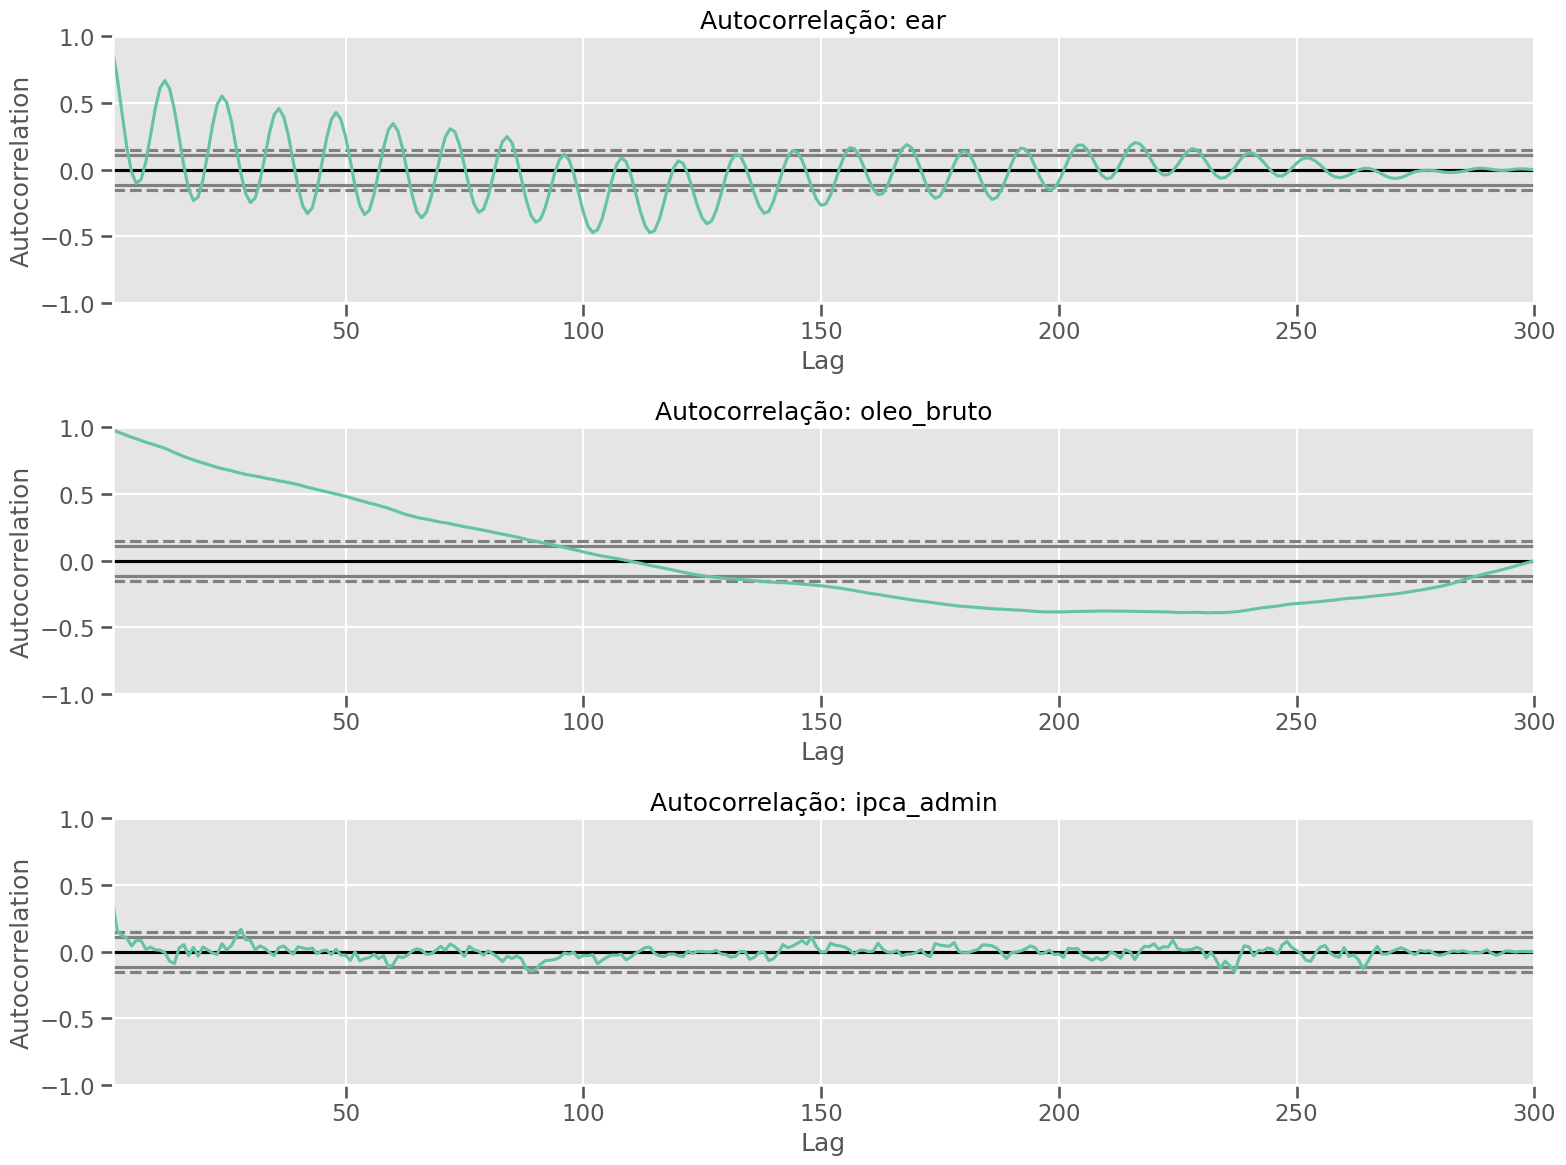


Análise de correlação cruzada entre as variáveis:


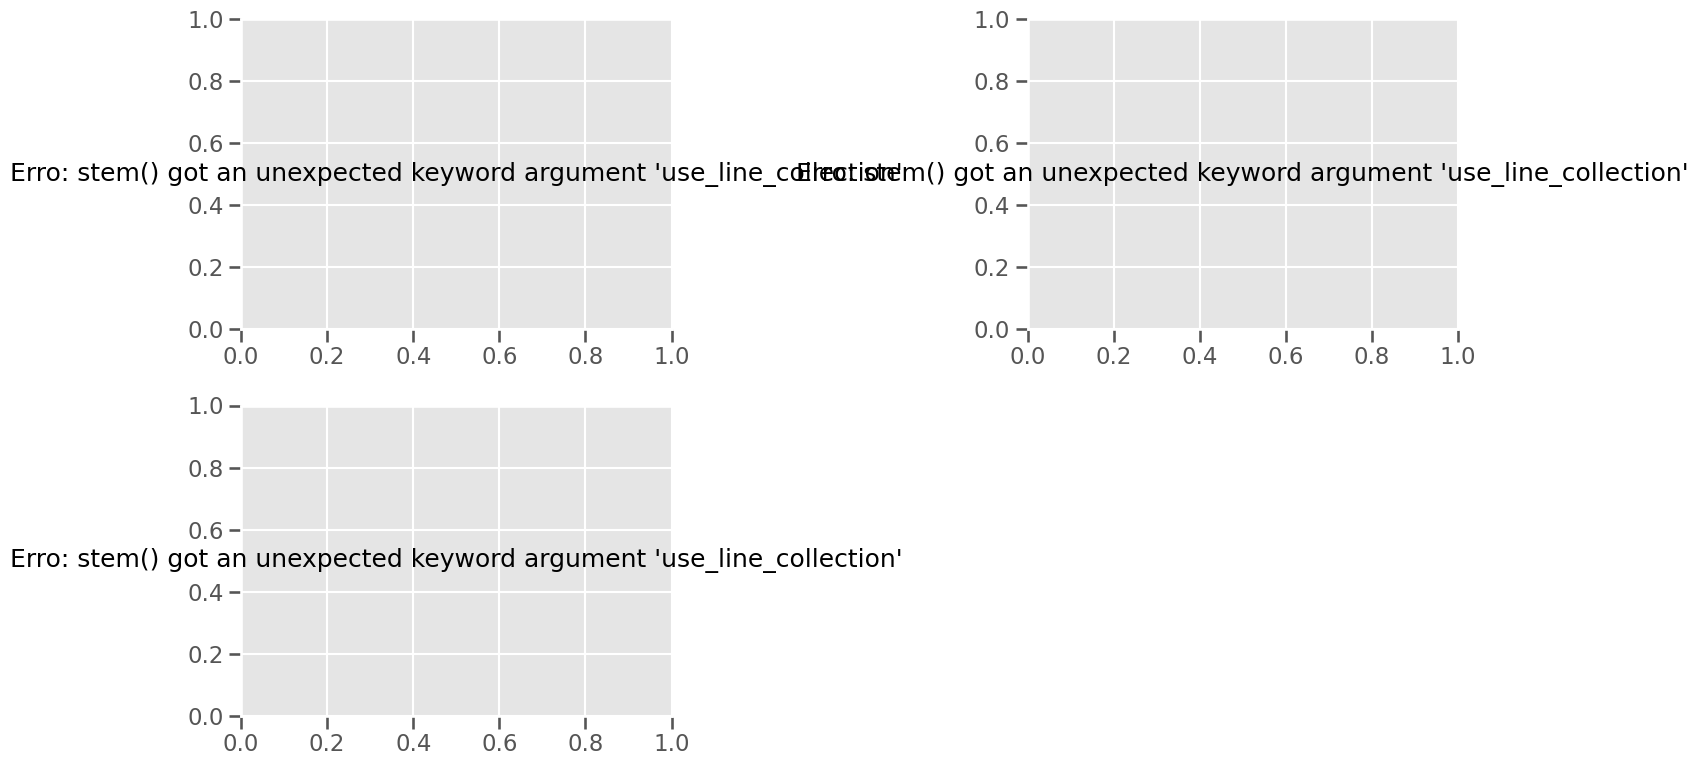

In [14]:
# 5. Análise de correlação entre as variáveis ao longo do tempo
plt.figure(figsize=(14, 10))

# Criar matriz de correlação
correlation_matrix = df_ts[numeric_columns].corr()

# Plotar o mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Matriz de Correlação entre as Variáveis', fontsize=14)
plt.tight_layout()
plt.show()

# Análise da correlação temporal (correlação em diferentes defasagens)
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(16, 12))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i+1)
    autocorrelation_plot(df_ts[column])
    plt.title(f'Autocorrelação: {column}')
    plt.grid(True)
    
plt.tight_layout()
plt.show()

# Análise de correlação cruzada entre as variáveis
print("\nAnálise de correlação cruzada entre as variáveis:")

if len(numeric_columns) >= 2:  # Precisamos de pelo menos 2 variáveis para correlação cruzada
    from statsmodels.tsa.stattools import ccf
    
    # Criar todas as combinações de pares de variáveis
    from itertools import combinations
    var_pairs = list(combinations(numeric_columns, 2))
    
    n_pairs = len(var_pairs)
    n_cols = 2
    n_rows = (n_pairs + 1) // 2
    
    plt.figure(figsize=(16, 4*n_rows))
    
    for i, (var1, var2) in enumerate(var_pairs):
        plt.subplot(n_rows, n_cols, i+1)
        
        # Calcular correlação cruzada
        try:
            # Normalizar dados para comparação adequada
            series1 = (df_ts[var1] - df_ts[var1].mean()) / df_ts[var1].std()
            series2 = (df_ts[var2] - df_ts[var2].mean()) / df_ts[var2].std()
            
            # Calcular correlação cruzada
            cross_corr = ccf(series1.dropna(), series2.dropna(), adjusted=False)
            
            # Plotar correlação cruzada
            lags = np.arange(-len(cross_corr)//2 + 1, len(cross_corr)//2 + 1)
            plt.stem(lags, cross_corr, use_line_collection=True)
            plt.axhline(y=0, color='gray', linestyle='--')
            plt.title(f'Correlação Cruzada: {var1} vs {var2}')
            plt.xlabel('Defasagem (Meses)')
            plt.ylabel('Correlação')
            plt.grid(True)
            
            # Encontrar a defasagem com maior correlação
            max_corr_idx = np.abs(cross_corr).argmax()
            max_lag = lags[max_corr_idx]
            max_corr = cross_corr[max_corr_idx]
            
            plt.annotate(f'Máx. Corr: {max_corr:.2f} no lag {max_lag}',
                        xy=(max_lag, max_corr),
                        xytext=(0, 30 if max_corr > 0 else -30),
                        textcoords='offset points',
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))
            
        except Exception as e:
            plt.text(0.5, 0.5, f"Erro: {e}", ha='center', va='center')
    
    plt.tight_layout()
    plt.show()